<a href="https://colab.research.google.com/github/bingsen-wang/Electric-Machines/blob/main/RotatingWaves3Phase12Pole_3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Rotating Wave for 3-Phase 12-Pole in Cylindrical Coordinates</h1></b>

Dr. Bingsen Wang

11/23/2024
</center>

#Python Code


0
0
200
400
600
800
1000
0


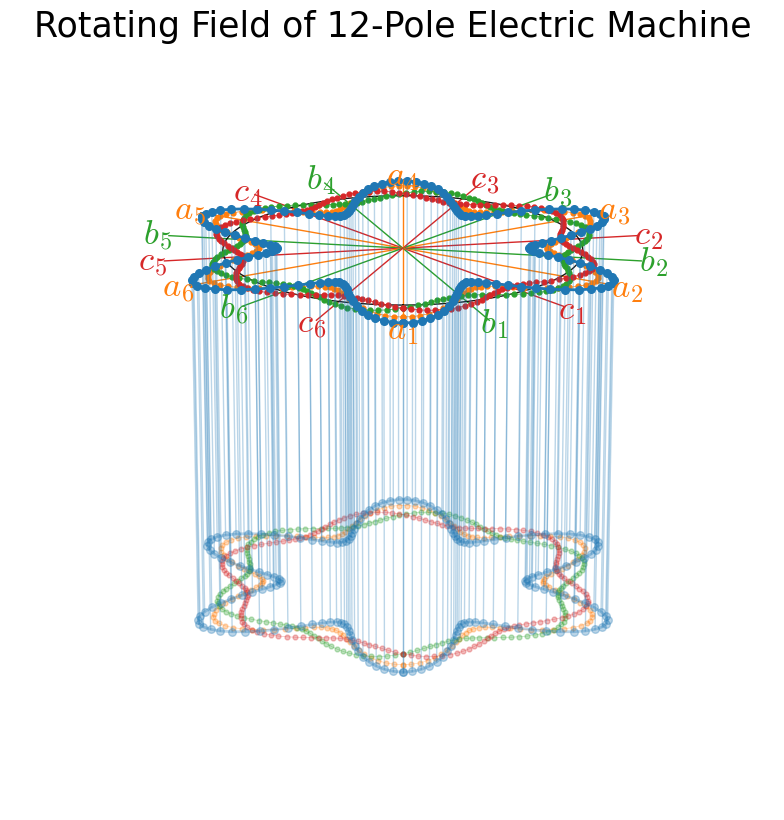

In [11]:
from numpy import linspace,sin,cos,pi,array,mgrid,meshgrid,index_exp,zeros,clip,sqrt,exp
from matplotlib import animation,pyplot,cm,colors
from mpl_toolkits.mplot3d import Axes3D
pyplot.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})
def f(k,theta,wt):
  return cos(theta-2/3*pi*k)*cos(wt-2/3*pi*k)

Nf,Ntheta,p = 200,160,6 #p: number of pole-pairs
r0,rmax,zmin,zmax = 1.5,2,-1,0
theta,t = linspace(0,2*pi,Ntheta),linspace(0,1,Nf)
clst = list(cm.tab10.colors)#colors of lines
fig = pyplot.figure(figsize=([9,9]))
ax0 = fig.add_axes((.075,.05,.85,.85),xlim=[-rmax,rmax],ylim=[-rmax,rmax],zlim=[zmin,zmax],
                   projection='3d')
ax0.axis('off')
focal = linspace(1,.12,Nf*p)
elev=linspace(20,60,Nf*p)
azim=linspace(0,30,Nf*p)
roll=linspace(0,135,Nf*p)
ax0.set_title('Rotating Field of 12-Pole Electric Machine',size=25)
[ax0.text3D((rmax+.1)*cos(2*pi/3/p*k),(rmax+.1)*sin(2*pi/3/p*k),zmax,
 ['$a$','$b$','$c$'][k%3]+f'$_{k//3+1}$',ha='center',va='center',
          size=25,c=clst[k%3+1]) for k in range(p*3)]
[ax0.plot([0,rmax*cos(i*pi*2/3/p)],[0,rmax*sin(i*pi*2/3/p)],[0,0],c=clst[1+i%3],
          lw=1) for i in range(3*p)]
ax0.plot(r0*cos(theta),r0*sin(theta),zmax+theta*0,'-k',lw=1,alpha=.9)
lines=[ax0.plot([],[],[],'-o',color=clst[i+1],markersize=3.5,lw=.5)[0] for i in range(3)]
[lines.append(ax0.plot([],[],[],'-o',color=clst[i+1],markersize=3.5,lw=.5,alpha=0.3)[0]) for i in range(3)]
[lines.append(ax0.plot([],[],'-o',color=clst[0],markersize=5.5,lw=2,alpha=1-.7*k)[0]) for k in range(2)]
lines_v = [ax0.plot([],[],[],'-',c=clst[0],lw=1,alpha=.3)[0] for i in range(Ntheta)]

def animate(ii):
  ax0.set_proj_type('persp',focal_length=focal[ii])
  ax0.view_init(elev=elev[ii], azim=azim[ii],roll=roll[ii])
  i=ii%Nf
  if i==0: print(ii) #for monitoring
  f012 = [f(k,p*theta,t[i]*2*pi) for k in range(3)]
  fsum = array(f012[0]+f012[1]+f012[2])
  f012_vec = [(f012[k]*.3+r0)*exp(1j*theta) for k in range(3)]
  fsum_vec = (fsum*.3+r0)*exp(1j*theta)
  for k in range(3):
    lines[k].set_data_3d(f012_vec[k].real,f012_vec[k].imag,zmax+theta*0)
    lines[k+3].set_data_3d(f012_vec[k].real,f012_vec[k].imag,zmin+theta*0)
  [lines_v[k].set_data_3d([fsum_vec[k].real,fsum_vec[k].real],
                           [fsum_vec[k].imag,fsum_vec[k].imag],
                           [zmax,zmin]) for k in range(Ntheta)]
  lines[6].set_data_3d(fsum_vec.real,fsum_vec.imag,zmax+theta*0)
  lines[7].set_data_3d(fsum_vec.real,fsum_vec.imag,zmin+theta*0)
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf*p, interval=50)
anim.save("RotatingWave3Phase12Pole_3d.mp4", writer=animation.FFMpegWriter(fps=50), dpi = 200)